# Introducci√≥n a la predicci√≥n de series de tiempo
En esta lecci√≥n y la siguiente, aprender√°s un poco acerca de la predicci√≥n de series de tiempo, una parte interesante y valiosa del repertorio de de un cient√≠fico de ML, la cual es un poco menos conocida que otros temas. La predicci√≥n de series de tiempo es una especie de 'bola de cristal': basada en el rendimiento pasado de una variable como el precio, puedes predecir su valor potencial futuro.

## Introducci√≥n
Sup√≥ngamos que mantienes un arreglo de parqu√≠metros inteligentes que proveen datos acerca de que tan seguido son usados y con qu√© duraci√≥n de tiempo.

¬øQu√© pasar√≠a si pudieras predecir, basado en el rendimiento pasado del medidor, su valor futuro de acuerdo a las leyes de suministro y demanda?

Predecir de forma precisa cu√°ndo actuar para as√≠ lograr tu objetivo es una desaf√≠o que podr√≠a ser abordado con la predicci√≥n de series de tiempo.No har√≠a feliz a la gente que le cobraran m√°s en hora pico cuando est√°n buscando un lugar para estacionarse, ¬°pero ser√≠a una forma segura de generar ingresos para limpiar las calles!

Exploremos algunos de los tipos de algoritmos de series de tiempo e iniciemos un notebook para limpiar y preparar algunos datos. Los datos que analizar√°s son tomados de la competencia de predicci√≥n de GEFCom2014. Esta consiste de 3 a√±os de carga el√©ctrica por hora y los valores de temperatura entre el 2012 y 2014. Dados los patrones hist√≥ricos de carga el√©ctrica y temperatura, puedes predecir valores futuros de carga el√©ctrica.

En este ejemplo, aprender√°s c√≥mo predecir un paso de tiempo adelante, usando s√≥lo la carga hist√≥rica. Antes de iniciar, sin embargo, es √∫til entender qu√© est√° pasando detr√°s de escena.

## Caracter√≠sticas de datos de series de tiempo a considerar
Al mirar datos de series de tiempo, puedes notar que tienen ciertas caracter√≠sticas que necesitas tomar ne consideraci√≥n y mitigar para entender mejor sus patrones. Si consideras los datos de las series de tiempo como proporcionando potencialmente una 'se√±al' que quieres analizar, estas caracter√≠sticas pueden ser interpretadas como 'ruido'. Frecuentemente necesitar√°s reducir este 'ruido' al compensar algunas de estas caracter√≠sticas usando ciertas t√©cnicas estad√≠sticas.

Aqu√≠ hay algunos conceptos que deber√≠as saber para ser capaz de trabajar con las series de tiempo:

üéì Tendencias

Las tendencias se definen como incrementos y decrementos medibles en el tiempo. Lee m√°s. En el contexto de las series de tiempo, se trata de c√≥mo usar las tendencias y, si es necesario, eliminarlas.

üéì Estacionalidad

La estacionalidad se define como fluctuaciones peri√≥dicas, tales como prisas de vacaciones que pueden afectar las ventas, por ejemplo. Da un vistazo a c√≥mo los distintos tipos de gr√°ficos muestran la estacionalidad en los datos.

üéì Valores at√≠picos

Los valores at√≠picos est√°n muy lejos de la varianza de datos est√°ndar.

üéì Ciclos de largo plazo

Independiente de la estacionalidad, los datos pueden mostrar un ciclo de largo plazo como un declive que dura m√°s de un a√±o.

üéì Varianza constante

En el tiempo, algunos datos muestran fluctuaciones constantes, tales como el uso de energ√≠a por d√≠a y noche.

üéì Cambios abruptos

Los datos pueden mostrar un cambio abrupto que puede necesitar mayor an√°lisis. El cierre abrupto de negocios debido al COVID, por ejemplo, caus√≥ cambios en los datos.

‚úÖ Aqu√≠ hay una muestra de gr√°fico de series de tiempo mostrando la moneda diaria en juego gastada en algunos a√±os. ¬øPuedes identificar alguna de las caracter√≠sticas listadas arriba en estos datos?
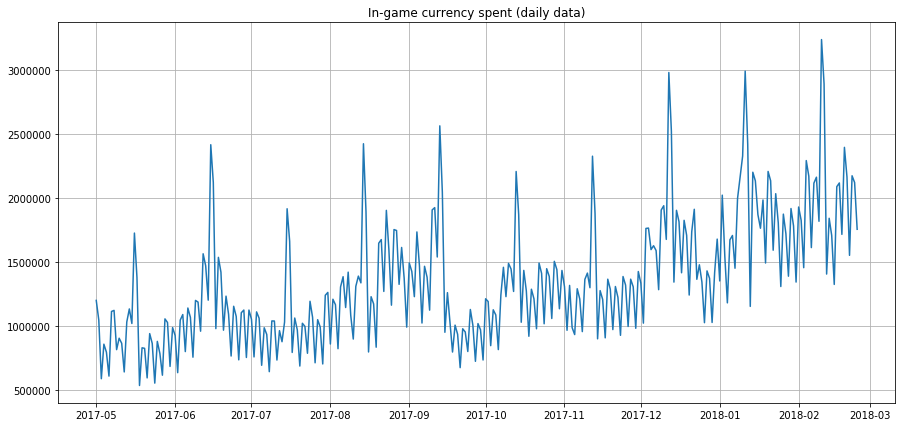

### Ejercicio - comenzando con los datos de uso de energ√≠a
Comencemos creando un modelo de series de tiempo para predecir el uso futuro de energ√≠a dato su uso pasado.

Los datos en este ejemplo se tomaron de la competencia de predicci√≥n GEFCom2014. Consta de 3 a√±os de valores de carga el√©ctrica y de temperatura medidos por hora entre 2012 y 2014.

Tao Hong, Pierre Pinson, Shu Fan, Hamidreza Zareipour, Alberto Troccoli y Rob J. Hyndman, "Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond", International Journal of Forecasting, vol.32, no.3, pp 896-913, July-September, 2016.

1. Empieza agregando las bibliotecas que te ayudar√°n a cargar y visualizar datos

In [3]:
import sys
sys.path.append('./common')

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from common.utils import load_data
%matplotlib inline

2. Ahora, examina los datos como un dataframe llamando load_data() y head():

In [5]:
data_dir = './Data'
energy = load_data(data_dir)[['load']]
energy.head()

load
2012-01-01 00:00:00  2698.0
2012-01-01 01:00:00  2558.0
2012-01-01 02:00:00  2444.0
2012-01-01 03:00:00  2402.0
2012-01-01 04:00:00  2403.0

3. Ahora, grafica los datos llamando `plot()`:

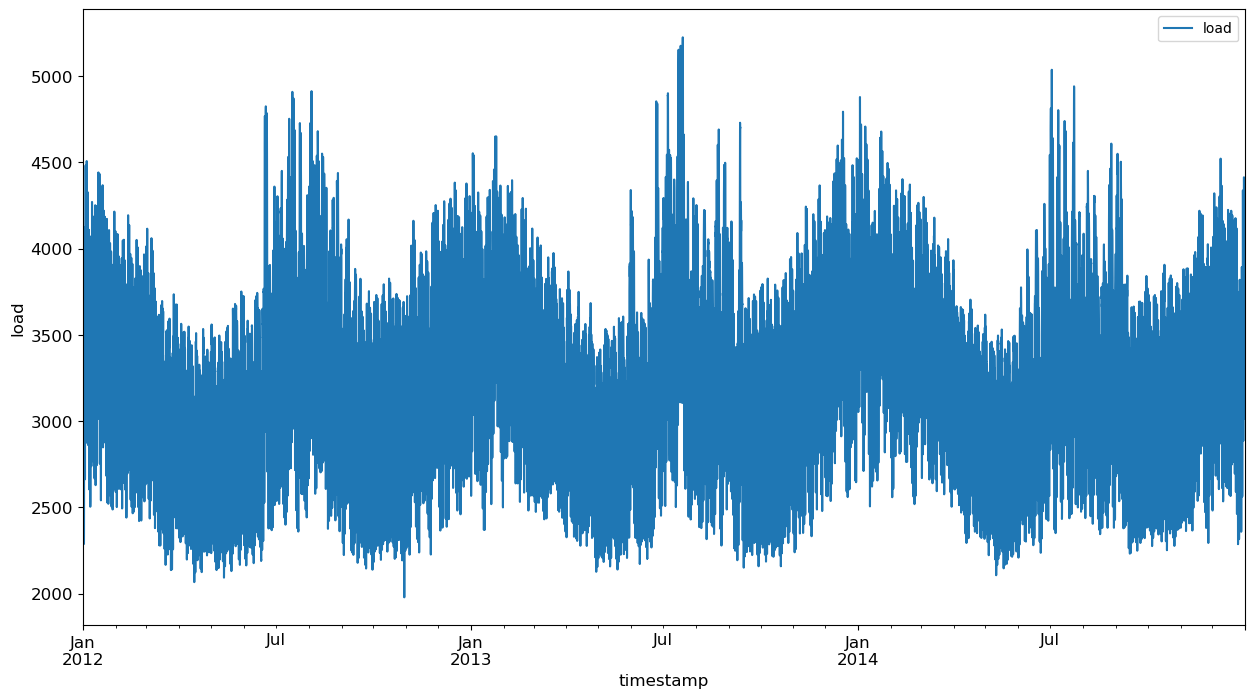

In [6]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

4. hora, grafica la primer semana de Julio de 2014, al proveerla como entrada a energy en el patr√≥n [from date]: [to date]:

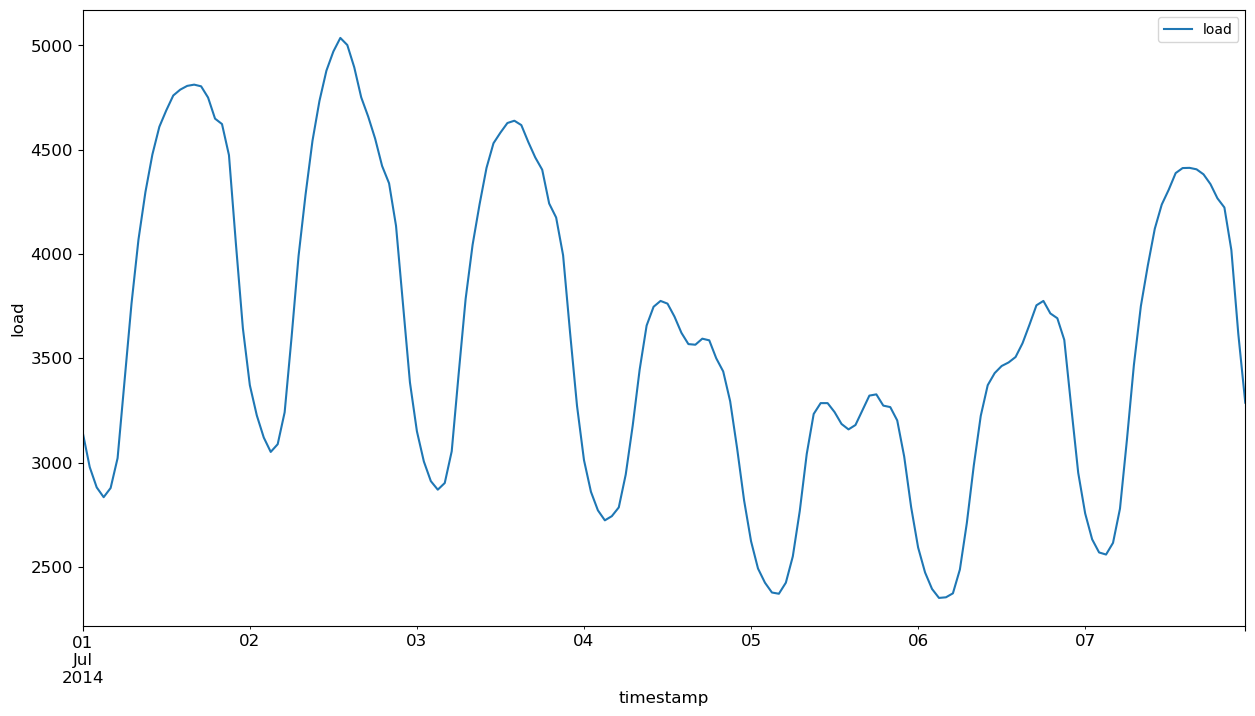

In [7]:
energy['2014-07-01':'2014-07-07'].plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

¬°Un hermoso gr√°fico! Demos un vistazo a estos gr√°ficos y ve si puedes determinar alguna de las caracter√≠sticas listadas arriba. ¬øQue podemos suponer al visualizar los datos?

En la siguiente lecci√≥n, se creara un modelo ARIMA para realizar algunas predicciones.